# ELE 435/535 Homework 3: Gradient Descent and Neural Networks

## Part 1. Neural Networks

In this part, we will use Keras and TensorFlow to train a neural network on MNIST dataset. We will compare the neural network with a multinomial softmax regression. Write the code for training these two models.

There are two options to do this: (1) Install TensorFlow as descibed below,   
OR   
use Google's Colab. Option 2 offers the potential of faster machines and a nice jupyter notebook style API. The code and results you write and run on Colab can be downloaded as a Jupyter notebook. NOTE: the load on Colab varies over time so don't wait to the last day to use Colab.

## 1. TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow 

## 2. Import keras from Tensorflow
There are many well-written tutorials on how to use TensorFlow. For example, see:  <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 95% test accuracy on MNIST.

In [1]:
# This code is provided
import tensorflow as tf
#print('tensorflow:', tf.__version__)

from tensorflow import keras
#print('keras: ', keras.__version__)

2022-12-12 00:30:54.174033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 3. Load the MINST dataset from keras

In [2]:
# This code is provided
# download the data
num_train = 30000
from tensorflow.keras.datasets import mnist
(train_images_2d, train_labels), (test_images_2d, test_labels) = mnist.load_data()
train_images_2d = train_images_2d[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images_2d.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images_2d.shape)
print('Training labels shape:',test_labels.shape)

# reshape and scale the images
train_images = train_images_2d.reshape(num_train,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images_2d.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

print('Reshaped training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

# process the labels to one-hot encoded form
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('One-hot encoded training labels shape:', train_labels.shape)
print('One-hot encoded testing labels shape:', test_labels.shape)

Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
Reshaped training images shape: (30000, 784)
Training labels shape: (30000,)
One-hot encoded training labels shape: (30000, 10)
One-hot encoded testing labels shape: (10000, 10)


## 4. Training a multinomial softmax regression using Keras/TensorFlow on MNIST
Write the code for training multinomial softmax regression using the keras API. The network is 784 (the size of the input layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then After training for 5 epochs, report the testing loss and testing accuracy.

In [3]:
#This code is given to you 

MSReg = keras.models.Sequential(name='MSReg_4_MNIST')

MSReg.add(keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))

MSReg.compile(optimizer = 'RMSprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

MSReg.summary()

Model: "MSReg_4_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-12-12 00:30:57.165901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# This code is given to you
MSReg.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

test_loss, test_acc = MSReg.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/5
235/235 [==============================] - 1s 808us/step - loss: 0.8121 - accuracy: 0.8044
Epoch 2/5
235/235 [==============================] - 0s 837us/step - loss: 0.3922 - accuracy: 0.8955
Epoch 3/5
235/235 [==============================] - 0s 836us/step - loss: 0.3367 - accuracy: 0.9080
Epoch 4/5
235/235 [==============================] - 0s 840us/step - loss: 0.3123 - accuracy: 0.9137
Epoch 5/5
235/235 [==============================] - 0s 784us/step - loss: 0.2975 - accuracy: 0.9182
test_loss 0.293476402759552
test_acc 0.9174000024795532


## 5. Training an multilayer perceptron (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the output layer) -> softmax (activiation function for the output layer). Then report the testing loss and testing accuracy.

In [5]:
#This code is given to you
Uno_HL = keras.models.Sequential(name='Uno_HL_NN')
Uno_HL.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
Uno_HL.add(keras.layers.Dense(10, activation='softmax'))
Uno_HL.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

Uno_HL.summary()

Model: "Uno_HL_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
#This code is given to you
Uno_HL.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1)

test_loss, test_acc = Uno_HL.evaluate(test_images, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3511 - accuracy: 0.8990
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1512 - accuracy: 0.9555
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9701
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0713 - accuracy: 0.9789
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9893
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9941
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.9961
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9968

## 6. Training a convolutional neural network (CNN) using Keras/TensorFlow on MNIST
Write the code for training a CNN using keras API. The first layer is the size of 64 with the kernel size of 3 and the relu activation; the second layer is the size of 32 with the kernel size of 3 and the relu activation, followed by faltten layer and the final output layer is 10 (the size of the output layer). Then report the testing loss and testing accuracy.

In [7]:
# create model

# your code here

CNN = keras.models.Sequential(name='CNN')

CNN.add(keras.layers.Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1)))
CNN.add(keras.layers.Conv2D(32, 3, activation='relu'))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(10, activation='softmax'))


CNN.compile(optimizer = 'RMSprop',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

CNN.summary()


Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_images_2d_reshape = train_images_2d[:,:,:,None]
test_images_2d_reshape = test_images_2d[:,:,:,None]

# Train

CNN.fit(train_images_2d_reshape, train_labels, epochs=10, batch_size=128, verbose=1)

# Test and print results

test_loss, test_acc = CNN.evaluate(test_images_2d_reshape, test_labels, verbose=0)
print('test_loss', test_loss)
print('test_acc', test_acc)

Epoch 1/10
235/235 [==============================] - 16s 66ms/step - loss: 0.9255 - accuracy: 0.9225
Epoch 2/10
235/235 [==============================] - 15s 66ms/step - loss: 0.0754 - accuracy: 0.9782
Epoch 3/10
235/235 [==============================] - 16s 67ms/step - loss: 0.0430 - accuracy: 0.9873
Epoch 4/10
235/235 [==============================] - 16s 67ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 5/10
235/235 [==============================] - 15s 65ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 6/10
235/235 [==============================] - 15s 65ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 7/10
235/235 [==============================] - 15s 65ms/step - loss: 0.0065 - accuracy: 0.9983
Epoch 8/10
235/235 [==============================] - 15s 65ms/step - loss: 0.0058 - accuracy: 0.9987
Epoch 9/10
235/235 [==============================] - 15s 65ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 10/10
235/235 [==============================] - 15s 65ms/step - loss: 0.004

## 6. Comparison between these three models
Which model is better? Please comment on this.

CNN is the best.

## Part 2. Autoencoder
In this part, we will use Keras and TensorFlow to train an autoencoder on MNIST dataset.

## 1. Training an autoencoer (MLP) using Keras/TensorFlow on MNIST
Write the code for training an MLP using keras API. The model parameter is 784 (the size of the input layer) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 10 (the size of the middle representation) -> 512 (middle hidden layer) -> relu (activiation function for the middle hidden layer) -> 784 (the size of the input). 

In [9]:
# This code is given to you
AE = keras.models.Sequential(name='AE')
AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
AE.add(keras.layers.Dense(10, activation='relu'))
AE.add(keras.layers.Dense(512, activation='relu'))
AE.add(keras.layers.Dense(784, activation='relu'))
AE.compile(optimizer = 'rmsprop',
               loss = 'MSE')

AE.summary()

Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
 dense_6 (Dense)             (None, 512)               5632      
                                                                 
 dense_7 (Dense)             (None, 784)               402192    
                                                                 
Total params: 814,874
Trainable params: 814,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fit the model, then report the testing loss and testing accuracy.
# Your code here

# Train

AE.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)

# Test and print results

test_loss = AE.evaluate(test_images, test_images, verbose=0)
print('test_loss', test_loss)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0444
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0320
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0279
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0255
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0242
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0233
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0226
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0218
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0211
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0207
test_loss 0.02077048271894455


## 2. Plot the reconstructed images
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images.

1/1 [==============================] - 0s 53ms/step


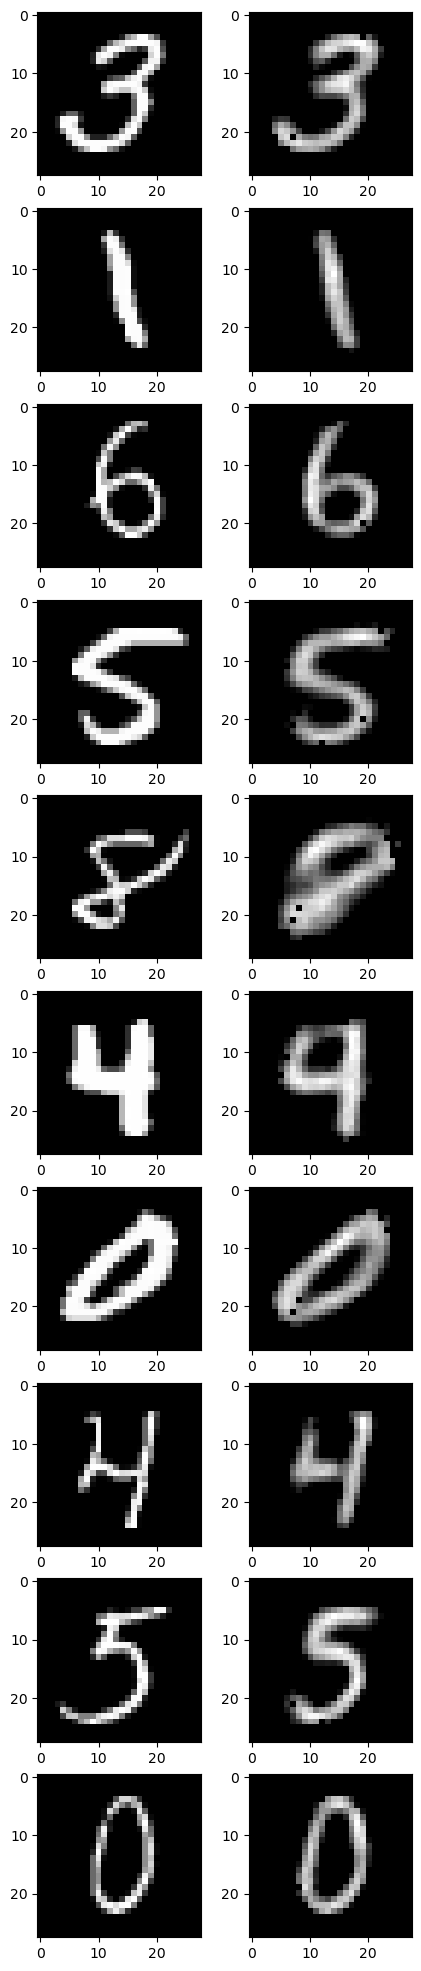

In [11]:
# Use Matplotlib
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.choice(train_images.shape[0], 10, replace=False)
sample_images = train_images[indices]
sample_image_predictions = AE.predict(sample_images)

fig = plt.figure(figsize=(5, 25))

for (i, (origin, prediction)) in enumerate(zip(sample_images, sample_image_predictions)):
    ax = fig.add_subplot(10, 2, 2 * i + 1)
    ax.imshow(origin.reshape(28, 28), cmap='gray')
    ax = fig.add_subplot(10, 2, 2 * i + 2)
    ax.imshow(prediction.reshape(28, 28), cmap='gray')

plt.show()



## 3. Vary the size of the middle representations.
Write the code for randomly plotting 10 image paris of the orginal and reconstrated images with the size of the middle representation being 5, 2, and 1.

Suggestion: write the model specification and the training as a function with the size of the middle layer as a parameter.

Size: 5
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0482
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0377
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0347
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0333
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0323
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0310
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0303
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0299
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0295
Epoch 10/10
1/1 [==============================] - 0s 38ms/step


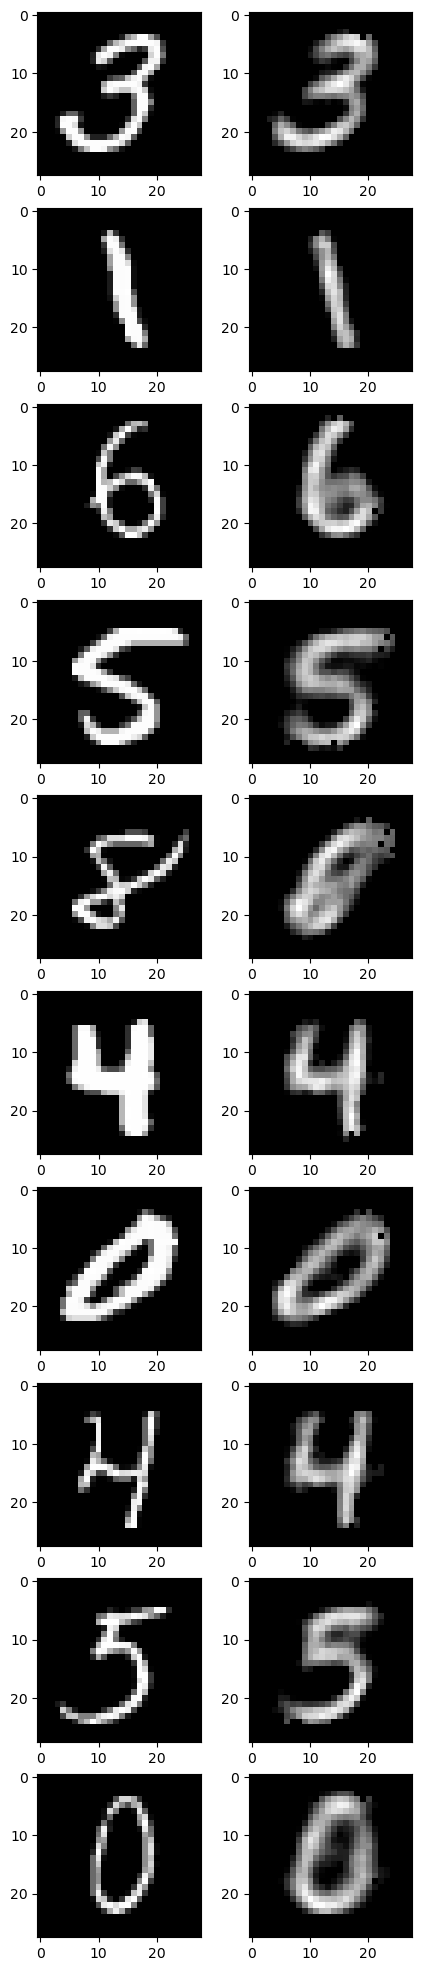

Size: 2
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0731
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0670
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0633
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0604
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0584
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0570
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0563
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0555
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0545
Epoch 10/10
1/1 [==============================] - 0s 36ms/step


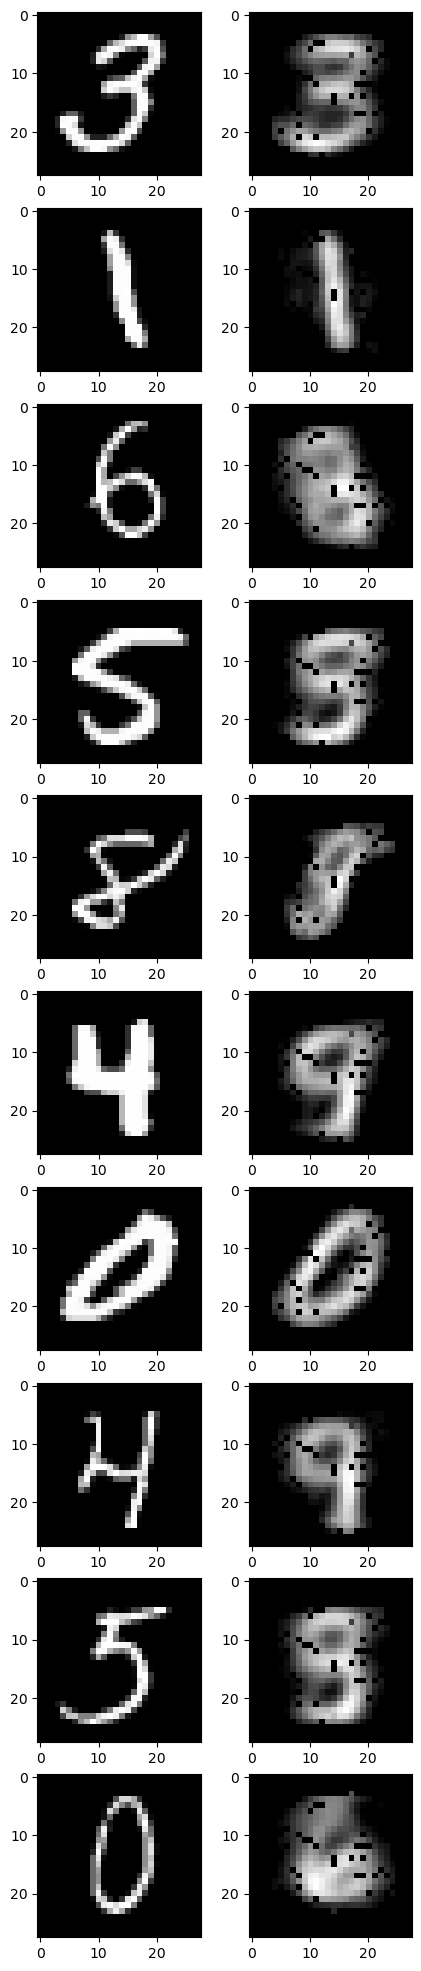

Size: 1
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0868
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0792
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0744
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0718
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0701
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0683
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0673
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0663
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0654
Epoch 10/10
1/1 [==============================] - 0s 35ms/step


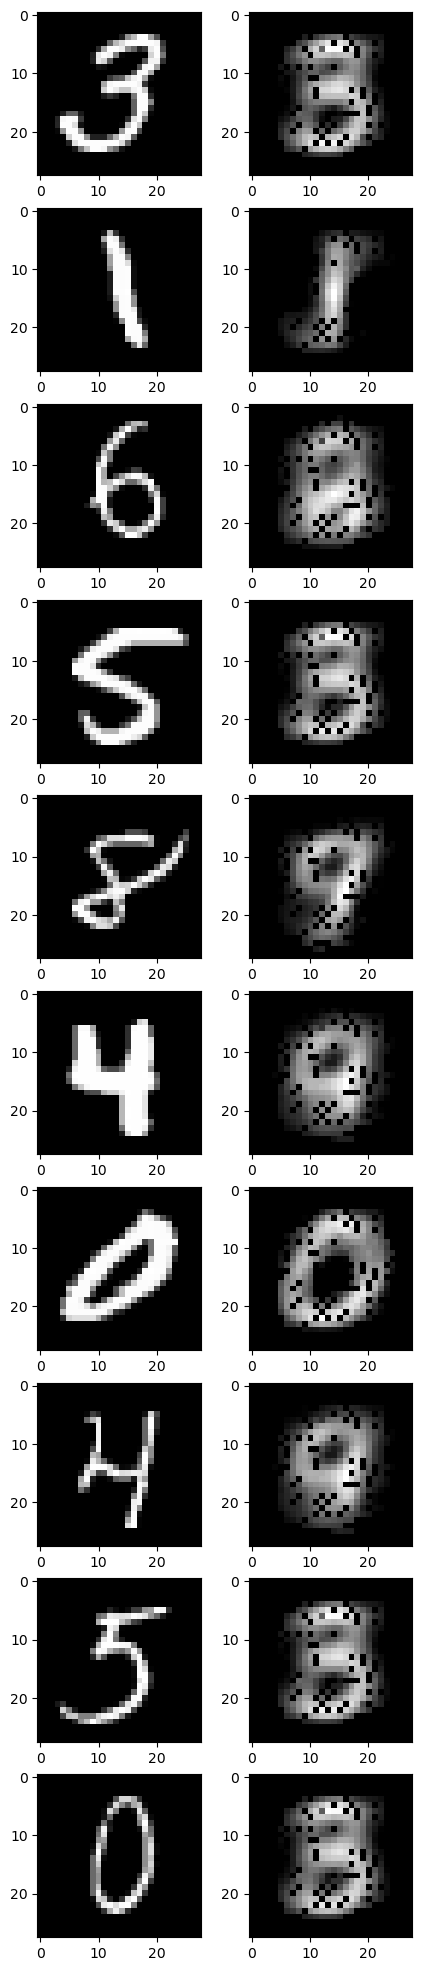

In [12]:
# Use Matplotlib
#import matplotlib.pyplot as plt

def model_AE(size):
    AE = keras.models.Sequential(name='AE')
    AE.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
    AE.add(keras.layers.Dense(size, activation='relu'))
    AE.add(keras.layers.Dense(512, activation='relu'))
    AE.add(keras.layers.Dense(784, activation='relu'))
    AE.compile(optimizer = 'rmsprop',
                   loss = 'MSE')
    
    AE.fit(train_images, train_images, epochs=10, batch_size=128, verbose=1)

    return AE

# your code here

for size in [5, 2, 1]:
    print("Size:", size)
    AE = model_AE(size)
    sample_image_predictions = AE.predict(sample_images)

    fig = plt.figure(figsize=(5, 25))

    for (i, (origin, prediction)) in enumerate(zip(sample_images, sample_image_predictions)):
        ax = fig.add_subplot(10, 2, 2 * i + 1)
        ax.imshow(origin.reshape(28, 28), cmap='gray')
        ax = fig.add_subplot(10, 2, 2 * i + 2)
        ax.imshow(prediction.reshape(28, 28), cmap='gray')

    plt.show()

## 4. What do you observe for varying the size of representations?
Please comment on this.

Larger the size, better the reconstruction.